In [1]:
import pandas as pd

In [2]:
df0514 = pd.read_csv('gov_uk_data.csv')

/Users/nithishkolli/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lets remove the first line of the CSV

In [3]:
df0514.drop('Unnamed: 0', axis=1, inplace=True)

Lets check the size of the our file

In [4]:
df0514.shape

(1504150, 33)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Lets plot the Number of Casualties and with the number of vehicles

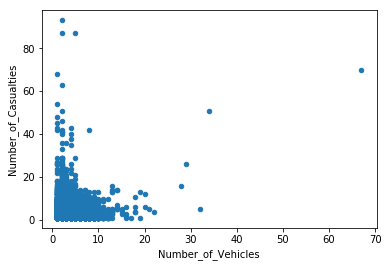

In [6]:
df0514.plot(kind='scatter', x='Number_of_Vehicles', y='Number_of_Casualties')

Lets plot the Accident Severity with Number of Casualties

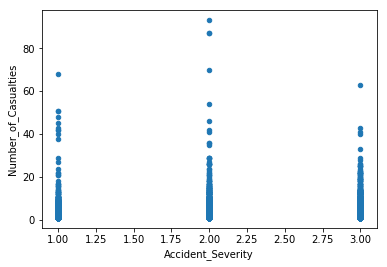

In [7]:
df0514.plot(kind='scatter', x='Accident_Severity', y='Number_of_Casualties')

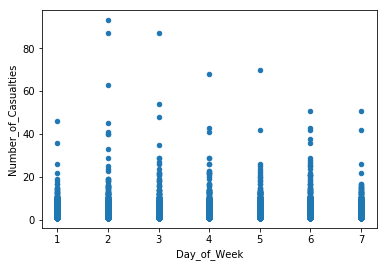

In [8]:
df0514.plot(kind='scatter', x='Day_of_Week', y='Number_of_Casualties')

In [9]:
df = df0514.copy()

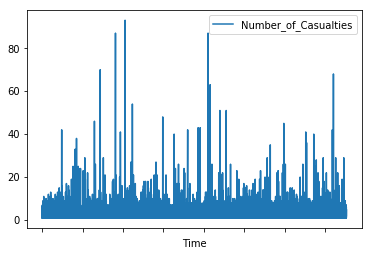

In [10]:
df.set_index('Time').plot(y='Number_of_Casualties')

We can see that from the above plots that there are lot of small values which are affecting our distribution

In [11]:
import numpy as np
def apply_minfilter(df, key, value):
    df[key] = np.where(df[key] > value, df[key], 0)

In [12]:
df0514['Number_of_Casualties'].value_counts()

1     1153856
2      241290
3       68858
4       25045
5        9216
6        3486
7        1161
8         511
9         246
10        134
11         88
12         47
13         42
14         27
15         16
16         15
17         15
22         11
18         11
19          9
21          8
26          7
29          6
20          4
24          4
23          4
25          4
42          3
27          2
40          2
51          2
87          2
41          2
43          2
36          2
38          1
35          1
28          1
45          1
46          1
48          1
33          1
54          1
63          1
68          1
70          1
93          1
Name: Number_of_Casualties, dtype: int64

From the above distribution of data, we can see that there is a lot of concentration from 1 to 8.
Lets try to ignore the casualities less than 8

In [13]:
apply_minfilter(df0514, 'Number_of_Casualties', 7)

In [14]:
df0514['Number_of_Casualties'].value_counts()

0     1502912
8         511
9         246
10        134
11         88
12         47
13         42
14         27
15         16
16         15
17         15
22         11
18         11
19          9
21          8
26          7
29          6
20          4
25          4
23          4
24          4
42          3
27          2
87          2
36          2
40          2
41          2
43          2
51          2
48          1
70          1
68          1
63          1
54          1
45          1
46          1
28          1
38          1
35          1
33          1
93          1
Name: Number_of_Casualties, dtype: int64

Now lets try the plot again

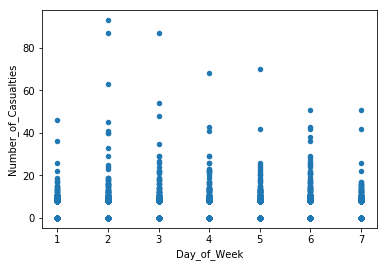

In [15]:
df0514.plot(kind='scatter', x='Day_of_Week', y='Number_of_Casualties')

Here we can see that there are accidents with high casuality at the start of the week (Monday is Day 2)

In [16]:
apply_minfilter(df0514, 'Number_of_Casualties', 20)

In [17]:
df0514['Number_of_Casualties'].value_counts()

0     1504077
22         11
21          8
26          7
29          6
23          4
24          4
25          4
42          3
51          2
27          2
43          2
41          2
40          2
87          2
36          2
28          1
93          1
33          1
35          1
45          1
46          1
48          1
54          1
63          1
68          1
70          1
38          1
Name: Number_of_Casualties, dtype: int64

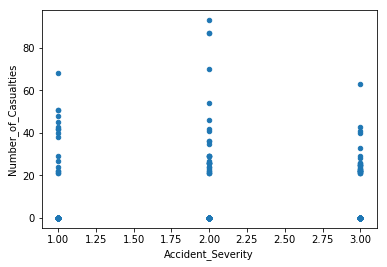

In [18]:
df0514.plot(kind='scatter', x='Accident_Severity', y='Number_of_Casualties')

In [19]:
def get_year(x):
    return x[x.rfind('/')+1:]

In [20]:
year_data = df0514['Date'].apply(get_year).value_counts().reset_index()

Lets see the trend for number of accidents over the years

<BarContainer object of 9 artists>

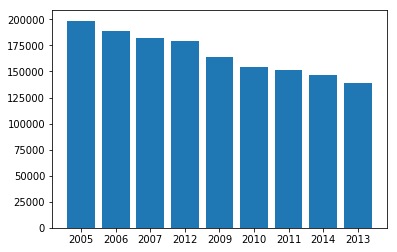

In [21]:
plt.bar(x=year_data['index'],height=year_data['Date'])